In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

In [2]:
# Objective: clean act & sat data for comparrison between charter schools and non-charter schools

In [3]:
# Import Data
df_act_raw = pd.read_csv('./data/act_2019_ca.csv')
df_act_raw.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [4]:
# Data Dictionary
# https://www.cde.ca.gov/ds/sp/ai/reclayoutact19.asp

In [5]:
df_act_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1953 non-null   object 
 11  AvgScrEng    1953 non-null   object 
 12  AvgScrMath   1953 non-null   object 
 13  AvgScrSci    1953 non-null   object 
 14  NumGE21      1953 non-null   object 
 15  PctGE21      1953 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

In [6]:
# Convert Year column to int of year compelted
df_act_raw['Year'] = 2019
df_act_raw.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2019,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2019,NaN


In [7]:
# Scores labeled '*' had fewer than 15 students test.. Dropping * & na values as they cannot provide a comparison value
df_act_raw['AvgScrRead'].value_counts()

*     532
23    136
25    132
21    131
19    118
22    118
24    117
18    116
20    114
26    105
27     72
17     66
16     57
28     54
29     32
15     27
30     10
14      7
31      5
13      2
12      1
32      1
Name: AvgScrRead, dtype: int64

In [8]:
df_act_raw.drop(df_act_raw[df_act_raw['NumTstTakr'] < 15].index, inplace=True)

In [9]:
df_act_raw.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2019,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2019,NaN
5,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2019,NaN
6,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2019,NaN
13,1.965136e+13,19.0,1965136.0,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,29,29,25,25,34,94.44,2019,NaN


<AxesSubplot:>

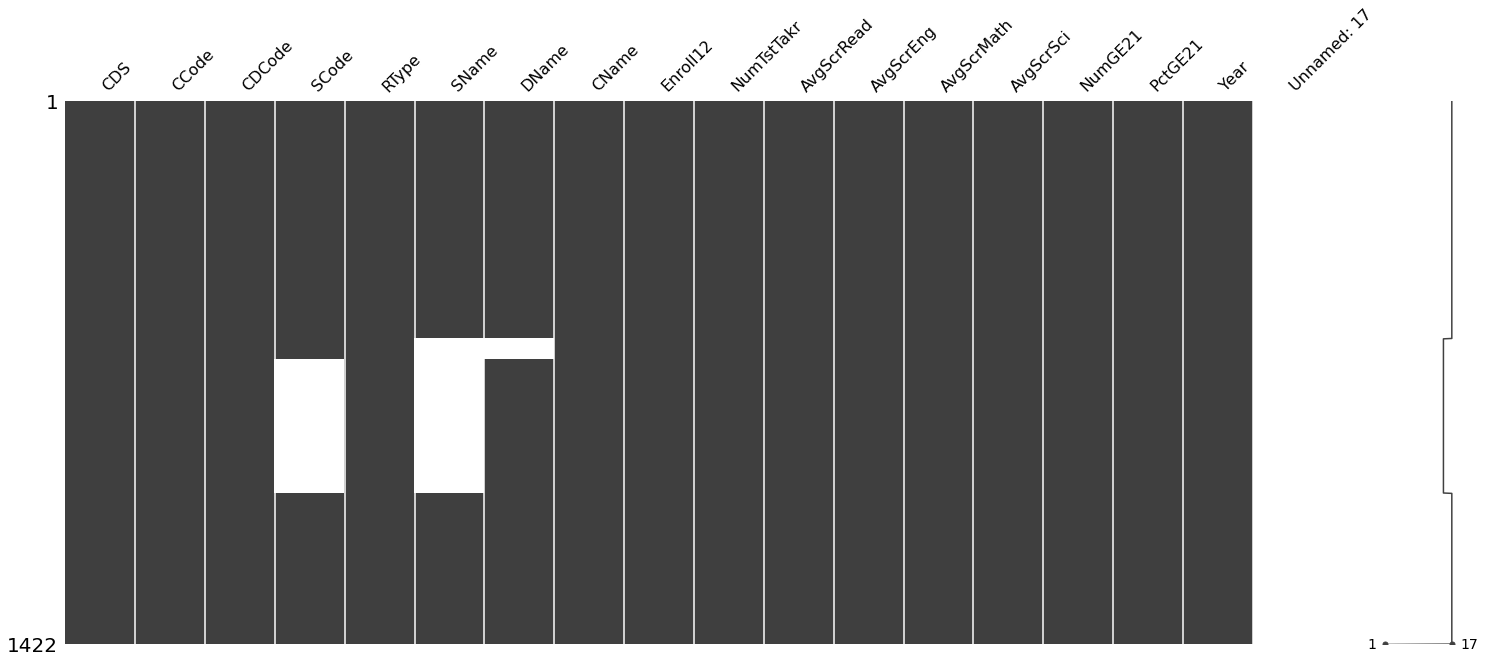

In [10]:
mn.matrix(df_act_raw)

In [11]:
# Locate Summary Types
df_act_raw['RType'].unique()

array(['S', 'C', 'D', 'X', nan], dtype=object)

In [12]:
df_act_raw[df_act_raw['RType'].isna()]

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
2309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN


In [13]:
# Final row is empty. Dropping.
df_act_raw.drop(labels=2309, inplace=True)
df_act_raw.reset_index(drop=True, inplace=True)

In [14]:
df_act_raw.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2019,NaN
1,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2019,NaN
2,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2019,NaN
3,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2019,NaN
4,1.965136e+13,19.0,1965136.0,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,29,29,25,25,34,94.44,2019,NaN


In [15]:
# Final column is empty
df_act_raw['Unnamed: 17'].notna().sum()

0

In [16]:
# Dropping column
df_act_raw.drop(axis=1, labels="Unnamed: 17", inplace=True)

In [17]:
# Observations without a District Name ("DName") are statistics aggregated by City
df_act_raw[df_act_raw['DName'].isna()].head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
622,3.400000e+13,34.0,0.0,0.0,C,NaN,NaN,Sacramento,19540.0,3065.0,21,20,21,21,1526,49.79,2019
623,3.900000e+13,39.0,0.0,0.0,C,NaN,NaN,San Joaquin,11778.0,1348.0,22,21,21,21,693,51.41,2019
624,1.500000e+13,15.0,0.0,0.0,C,NaN,NaN,Kern,14229.0,1257.0,21,20,20,20,544,43.28,2019
625,4.500000e+13,45.0,0.0,0.0,C,NaN,NaN,Shasta,2161.0,173.0,26,24,24,24,131,75.72,2019
626,5.100000e+13,51.0,0.0,0.0,C,NaN,NaN,Sutter,1827.0,196.0,23,22,22,22,117,59.69,2019


In [18]:
# Where School Code ("SCode") is empty, we have statistics aggregated by District
df_act_raw['RType'][df_act_raw['SCode'].isna()].value_counts()

D    350
Name: RType, dtype: int64

In [19]:
df_act_raw['RType'].value_counts()

S    1016
D     350
C      54
X       1
Name: RType, dtype: int64

<AxesSubplot:>

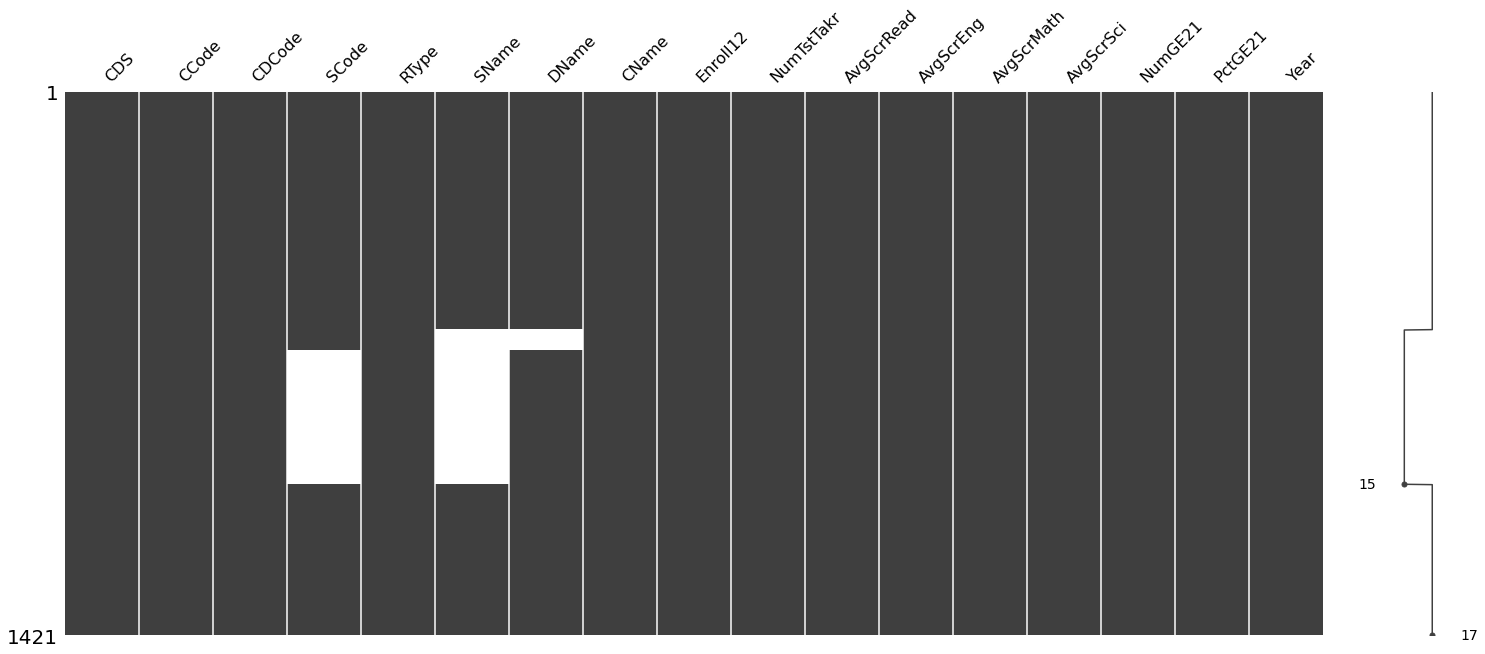

In [20]:
mn.matrix(df_act_raw)

In [21]:
# We have no missing values, but the avg score and number of 21+ scores is still formatted as string
df_act_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         1421 non-null   float64
 1   CCode       1421 non-null   float64
 2   CDCode      1421 non-null   float64
 3   SCode       1071 non-null   float64
 4   RType       1421 non-null   object 
 5   SName       1017 non-null   object 
 6   DName       1367 non-null   object 
 7   CName       1421 non-null   object 
 8   Enroll12    1421 non-null   float64
 9   NumTstTakr  1421 non-null   float64
 10  AvgScrRead  1421 non-null   object 
 11  AvgScrEng   1421 non-null   object 
 12  AvgScrMath  1421 non-null   object 
 13  AvgScrSci   1421 non-null   object 
 14  NumGE21     1421 non-null   object 
 15  PctGE21     1421 non-null   object 
 16  Year        1421 non-null   int64  
dtypes: float64(6), int64(1), object(10)
memory usage: 188.9+ KB


In [22]:
# Convert string columns to numeric
for i in range(10, 16):
    df_act_raw.iloc[:, i] = pd.to_numeric(df_act_raw.iloc[:, i])

In [23]:
# Parse data by type ("School", "District", "City", "State")
df_act_scho = pd.DataFrame(df_act_raw[df_act_raw['RType'] == 'S'])
df_act_scho.reset_index(drop=True, inplace=True)

df_act_dist = pd.DataFrame(df_act_raw[df_act_raw['RType'] == 'D'])
df_act_dist.reset_index(drop=True, inplace=True)

df_act_city = pd.DataFrame(df_act_raw[df_act_raw['RType'] == 'C'])
df_act_city.reset_index(drop=True, inplace=True)

df_act_state = pd.DataFrame(df_act_raw[df_act_raw['RType'] == 'X'])
df_act_state.reset_index(drop=True, inplace=True)

In [24]:
df_act_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CDS         350 non-null    float64
 1   CCode       350 non-null    float64
 2   CDCode      350 non-null    float64
 3   SCode       0 non-null      float64
 4   RType       350 non-null    object 
 5   SName       0 non-null      object 
 6   DName       350 non-null    object 
 7   CName       350 non-null    object 
 8   Enroll12    350 non-null    float64
 9   NumTstTakr  350 non-null    float64
 10  AvgScrRead  350 non-null    int64  
 11  AvgScrEng   350 non-null    int64  
 12  AvgScrMath  350 non-null    int64  
 13  AvgScrSci   350 non-null    int64  
 14  NumGE21     350 non-null    int64  
 15  PctGE21     350 non-null    float64
 16  Year        350 non-null    int64  
dtypes: float64(7), int64(6), object(4)
memory usage: 46.6+ KB


In [25]:
# ACT data has been successfully cleaned and is now ready for EDA
df_act_city.to_csv('./data-clean/act_ca_city_2019.csv', index=False)
df_act_dist.to_csv('./data-clean/act_ca_district_2019.csv', index=False)
df_act_scho.to_csv('./data-clean/act_ca_school_2019.csv', index=False)
df_act_state.to_csv('./data-clean/act_ca_state_2019.csv', index=False)


In [26]:
# Load SAT data
df_sat_raw = pd.read_csv("./data/sat_2019_ca.csv")
df_sat_raw.head(5)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [27]:
# Data Dictionary
# https://www.cde.ca.gov/ds/sp/ai/reclayoutsat19.asp

In [28]:
df_sat_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

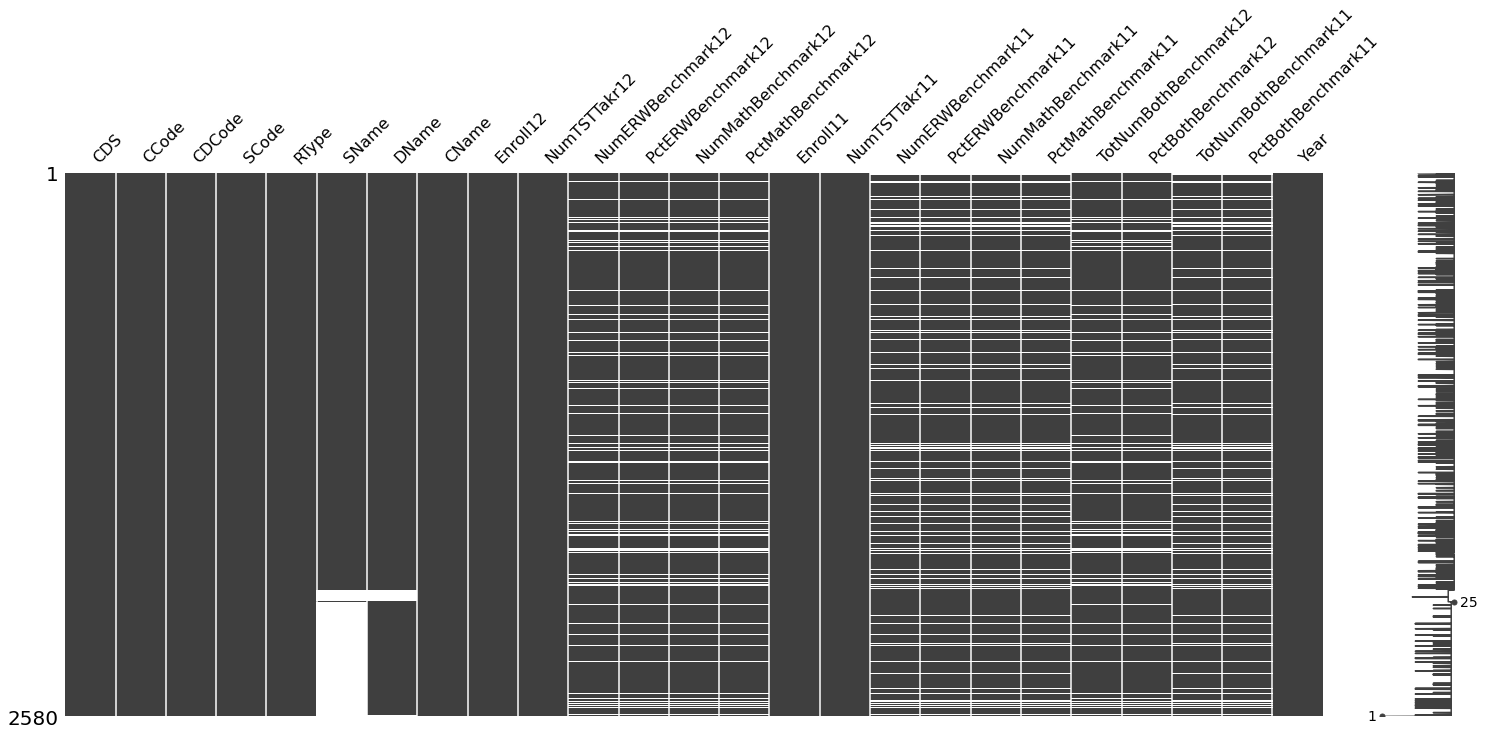

In [29]:
# Clean year and drop unnamed column
df_sat_raw['Year'] = 2019
df_sat_raw.drop(axis=1, labels="Unnamed: 25", inplace=True)

# View data
mn.matrix(df_sat_raw);

In [30]:
# Drop schools with viewer than 15 test takers
df_sat_raw = pd.DataFrame(df_sat_raw[df_sat_raw['NumTSTTakr12'] >= 15])

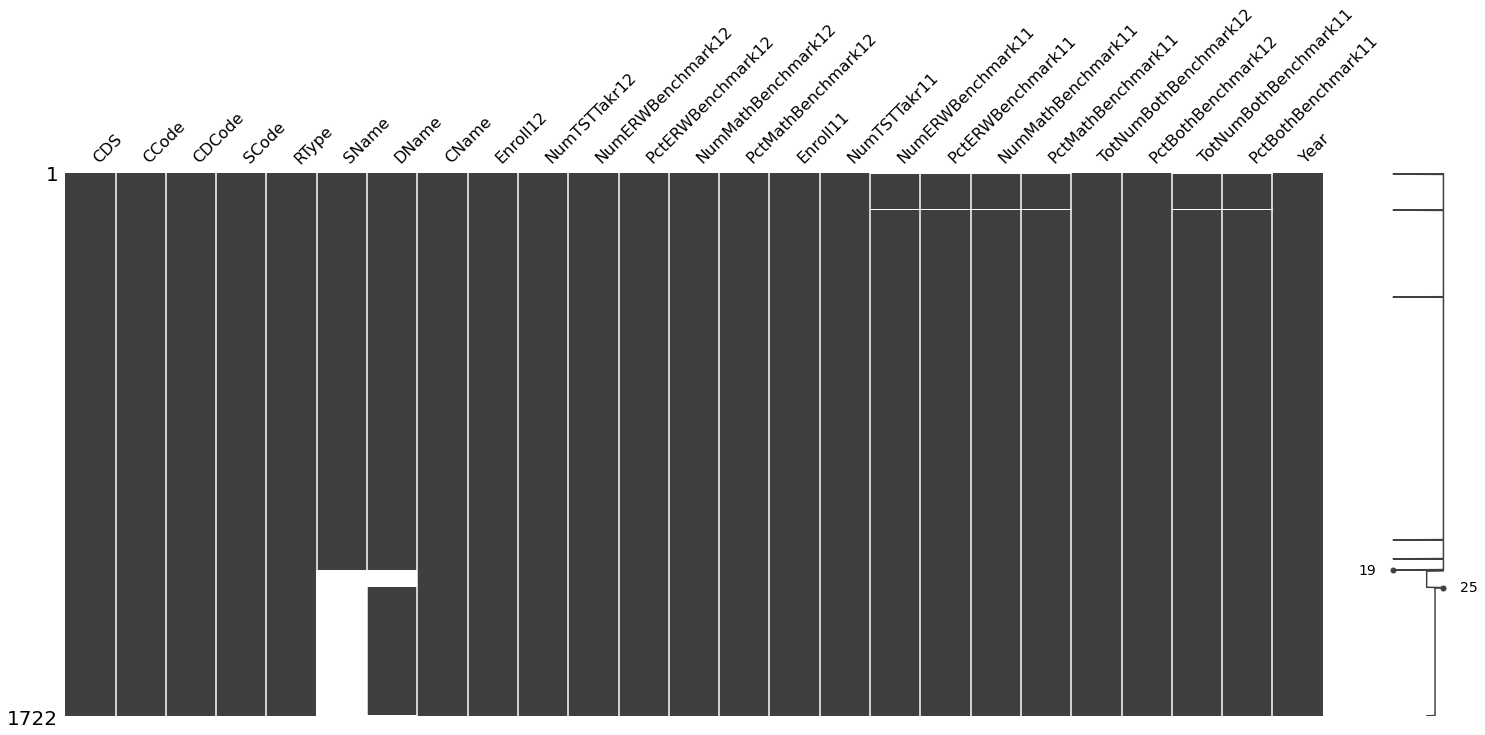

In [31]:
mn.matrix(df_sat_raw);

In [32]:
# Drop 11th grade stats. Focusing on 12 only. 11th has a few more missing values.
df_sat_raw.drop(axis=1, labels=['Enroll11', 'NumTSTTakr11', 'NumERWBenchmark11', 'PctERWBenchmark11',
                                'NumMathBenchmark11', 'PctMathBenchmark11', 'TotNumBothBenchmark11', 'PctBothBenchmark11'], inplace=True)

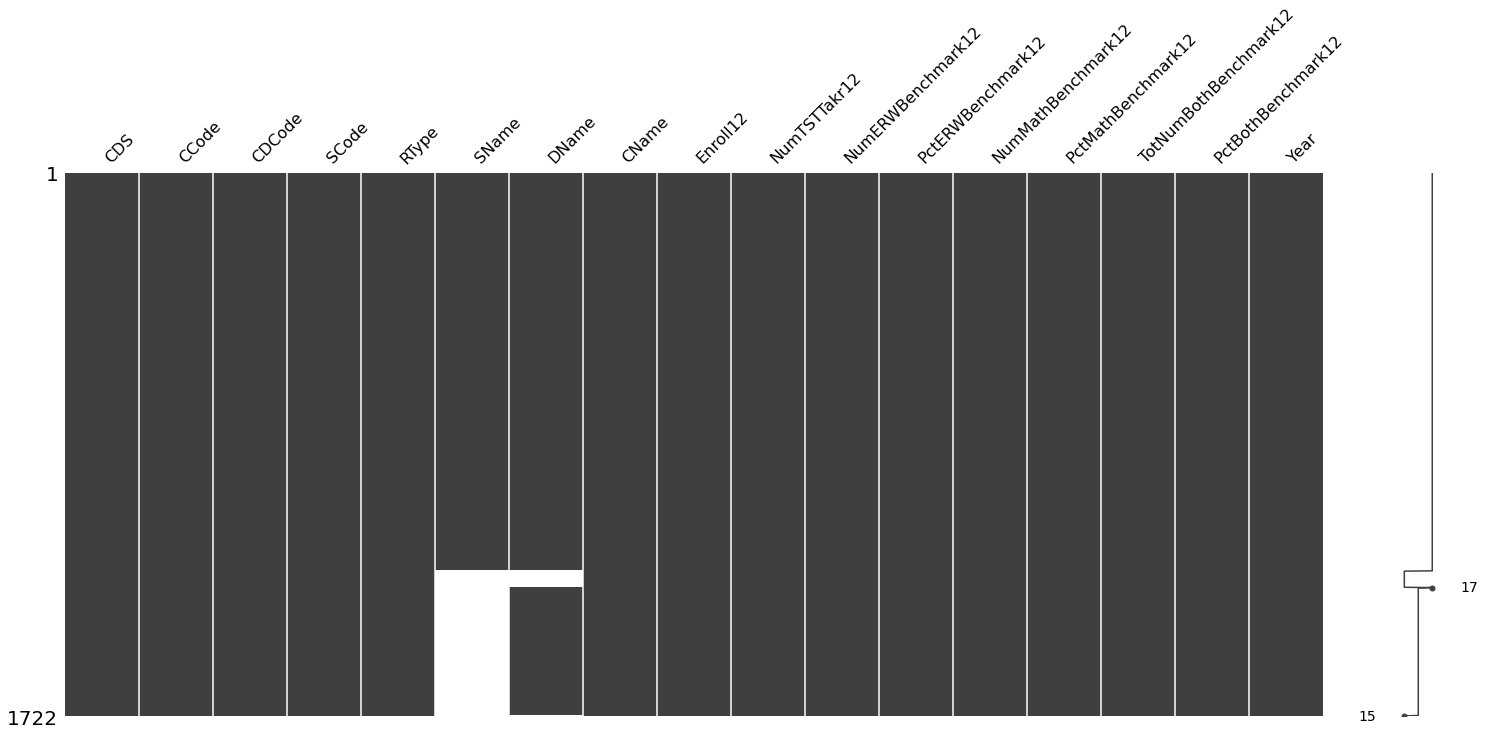

In [33]:
mn.matrix(df_sat_raw);

In [34]:
df_sat_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722 entries, 2 to 2578
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    1722 non-null   float64
 1   CCode                  1722 non-null   float64
 2   CDCode                 1722 non-null   float64
 3   SCode                  1722 non-null   float64
 4   RType                  1722 non-null   object 
 5   SName                  1262 non-null   object 
 6   DName                  1667 non-null   object 
 7   CName                  1722 non-null   object 
 8   Enroll12               1722 non-null   float64
 9   NumTSTTakr12           1722 non-null   float64
 10  NumERWBenchmark12      1722 non-null   object 
 11  PctERWBenchmark12      1722 non-null   object 
 12  NumMathBenchmark12     1722 non-null   object 
 13  PctMathBenchmark12     1722 non-null   object 
 14  TotNumBothBenchmark12  1722 non-null   object 
 15  PctB

In [35]:
for c in range(10, 16):
    df_sat_raw.iloc[:, c] = pd.to_numeric(df_sat_raw.iloc[:, c])
df_sat_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722 entries, 2 to 2578
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    1722 non-null   float64
 1   CCode                  1722 non-null   float64
 2   CDCode                 1722 non-null   float64
 3   SCode                  1722 non-null   float64
 4   RType                  1722 non-null   object 
 5   SName                  1262 non-null   object 
 6   DName                  1667 non-null   object 
 7   CName                  1722 non-null   object 
 8   Enroll12               1722 non-null   float64
 9   NumTSTTakr12           1722 non-null   float64
 10  NumERWBenchmark12      1722 non-null   int64  
 11  PctERWBenchmark12      1722 non-null   float64
 12  NumMathBenchmark12     1722 non-null   int64  
 13  PctMathBenchmark12     1722 non-null   float64
 14  TotNumBothBenchmark12  1722 non-null   int64  
 15  PctB

In [36]:
df_sat_raw['RType'].value_counts()

S    1261
D     405
C      55
X       1
Name: RType, dtype: int64

In [37]:
# Parse data by type ("School", "District", "City", "State")
df_sat_scho = pd.DataFrame(df_sat_raw[df_sat_raw['RType'] == 'S'])
df_sat_scho.reset_index(drop=True, inplace=True)

df_sat_dist = pd.DataFrame(df_sat_raw[df_sat_raw['RType'] == 'D'])
df_sat_dist.reset_index(drop=True, inplace=True)

df_sat_city = pd.DataFrame(df_sat_raw[df_sat_raw['RType'] == 'C'])
df_sat_city.reset_index(drop=True, inplace=True)

df_sat_state = pd.DataFrame(df_sat_raw[df_sat_raw['RType'] == 'X'])
df_sat_state.reset_index(drop=True, inplace=True)

In [38]:
df_sat_scho.describe()

,CDS,CCode,CDCode,SCode,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year
count,1.261000e+03,1261.000000,1.261000e+03,1.261000e+03,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.0
mean,2.848148e+13,27.818398,2.848147e+06,2.169185e+06,329.314830,133.395718,91.285488,66.655345,64.084853,44.378676,60.649485,41.948208,2019.0
std,1.360293e+13,13.573826,1.360293e+06,1.783090e+06,211.895718,106.162976,76.860187,21.480758,63.646481,23.747142,61.430688,23.732121,0.0
min,1.100170e+12,1.000000,1.100170e+05,1.000650e+05,25.000000,15.000000,1.000000,1.280000,0.000000,0.000000,0.000000,0.000000,2019.0
25%,1.964733e+13,19.000000,1.964733e+06,1.273810e+05,128.000000,54.000000,31.000000,51.280000,16.000000,25.000000,15.000000,22.160000,2019.0
50%,3.066514e+13,30.000000,3.066514e+06,1.936947e+06,321.000000,108.000000,70.000000,69.810000,43.000000,42.490000,39.000000,39.660000,2019.0
75%,3.768338e+13,37.000000,3.768338e+06,3.633302e+06,490.000000,183.000000,133.000000,84.850000,92.000000,63.270000,87.000000,60.970000,2019.0
max,5.872770e+13,58.000000,5.872769e+06,6.120893e+06,1135.000000,932.000000,475.000000,100.000000,390.000000,100.000000,385.000000,100.000000,2019.0


In [39]:
# SAT data has been successfully cleaned and is now ready for EDA
df_sat_city.to_csv('./data-clean/sat_ca_city_2019.csv', index=False)
df_sat_dist.to_csv('./data-clean/sat_ca_district_2019.csv', index=False)
df_sat_scho.to_csv('./data-clean/sat_ca_school_2019.csv', index=False)
df_sat_state.to_csv('./data-clean/sat_ca_state_2019.csv', index=False)

In [40]:
# load charter school data frame
df_charter = pd.read_csv('./school_scraper/charter.csv')

In [41]:
df_charter.head()

,school name,charter number,site type,more details,statistical info,county
0,Academy of Alameda Middle School,1181,Site-based Instruction,Academy of Alameda Middle School,DataQuest Reports,Alameda
1,Achieve Academy,780,Site-based Instruction,Achieve Academy,DataQuest Reports,Alameda
2,AIMS College Prep Middle School,106,Site-based Instruction,AIMS College Prep Middle School,DataQuest Reports,Alameda
3,AIMS High School,765,Site-based Instruction,AIMS High School,DataQuest Reports,Alameda
4,Alameda Community Learning Center,352,Site-based Instruction,Alameda Community Learning Center,DataQuest Reports,Alameda


In [42]:
import difflib

In [43]:
# Check if school name has similar charter name
def check_sim(school_name):
    """checks school name againt data frame containing all charter schools in CA.
    Returns similarity score via difflib.SequenceMatcher, charter school name target school resembles, and county of charter school"""
    max_similarity = (0, "", "")
    for charter in list(df_charter['school name']):
        sim_test = difflib.SequenceMatcher(None, school_name, charter).ratio()                  # scores similarity between all charter schools in list and school name
        if sim_test > max_similarity[0]:                                                        # gathers the largest similarity score
            county = df_charter['county'][df_charter['school name'] == charter].values[0]       # grabs county for further similarity checking
            max_similarity = (sim_test, charter, county)
    return max_similarity[0], max_similarity[1], max_similarity[2]

# similarity test adapted from stack overflow user: duhaime. source: https://stackoverflow.com/a/31236578

In [44]:
# Check school name similarity and create new columns for sat dataset
df_sat_scho['sim'],  df_sat_scho['sim_name'], df_sat_scho['sim_name_county'] = zip(*df_sat_scho['SName'].map(check_sim))
# unzipping multiple columns adapted from stack overflow user: ostrokach. source: https://stackoverflow.com/a/27385043

In [45]:
# Check school name similarity and create new columns for act dataset
df_act_scho['sim'],  df_act_scho['sim_name'], df_act_scho['sim_name_county'] = zip(*df_act_scho['SName'].map(check_sim))
# unzipping multiple columns adapted from stack overflow user: ostrokach. source: https://stackoverflow.com/a/27385043

In [46]:
# Locate similarly named schools between charter dataset and sat dataset
# Perform a manual cross reference
df_sat_scho[['SName', 'CName', 'sim', 'sim_name', 'sim_name_county']][(df_sat_scho['sim'] < 1) & (df_sat_scho['sim'] > .7) &
 (df_sat_scho['CName'] == df_sat_scho['sim_name_county'])].sort_values(by='sim', ascending=False)

,SName,CName,sim,sim_name,sim_name_county
975,PUC Early College Academy for Leaders and Scho...,Los Angeles,0.982759,PUC Early College Academy for Leaders and Scho...,Los Angeles
249,CATCH Prep Charter High Inc.,Los Angeles,0.982456,"CATCH Prep Charter High, Inc.",Los Angeles
978,Visions In Education,Sacramento,0.950000,Visions in Education,Sacramento
857,Alliance Judy Ivie Burton Technology Academy High,Los Angeles,0.946237,Alliance Judy Ivie Burton Technology Academy,Los Angeles
116,Animo College Preparatory Academy,Los Angeles,0.916667,Animo Watts College Preparatory Academy,Los Angeles
1074,Da Vinci Communications,Los Angeles,0.901961,Da Vinci Communications High,Los Angeles
1085,Granada Hills Charter High,Los Angeles,0.893617,Granada Hills Charter,Los Angeles
687,Middle College High,Orange,0.863636,Unity Middle College High,Orange
211,Options for Youth-Acton,Los Angeles,0.846154,"Options For Youth-Acton, INC.",Los Angeles
71,Summit Public School: Rainier,Santa Clara,0.842105,Summit Public School: Denali,Santa Clara


In [47]:
# Correct similarly named schools for charter school / school name merge in sat dataset
df_sat_scho.loc[[975, 249, 978, 857, 116, 1074, 1085, 211, 1137, 930, 125, ], 'sim'] = 1
# Found an additional 11 charter schools

In [48]:
# Locate similarly named schools between charter dataset and act dataset
# Perform a manual cross reference
df_act_scho[['SName', 'CName', 'sim', 'sim_name', 'sim_name_county']][(df_act_scho['sim'] < 1) & (df_act_scho['sim'] > .7) &
 (df_act_scho['CName'] == df_act_scho['sim_name_county'])].sort_values(by='sim', ascending=False)

,SName,CName,sim,sim_name,sim_name_county
500,Lennox Mathematics Science and Technology Academy,Los Angeles,0.989899,"Lennox Mathematics, Science and Technology Aca...",Los Angeles
733,PUC Early College Academy for Leaders and Scho...,Los Angeles,0.982759,PUC Early College Academy for Leaders and Scho...,Los Angeles
23,Alliance Judy Ivie Burton Technology Academy High,Los Angeles,0.946237,Alliance Judy Ivie Burton Technology Academy,Los Angeles
44,Animo College Preparatory Academy,Los Angeles,0.916667,Animo Watts College Preparatory Academy,Los Angeles
224,Da Vinci Communications,Los Angeles,0.901961,Da Vinci Communications High,Los Angeles
364,Granada Hills Charter High,Los Angeles,0.893617,Granada Hills Charter,Los Angeles
573,Middle College High,Orange,0.863636,Unity Middle College High,Orange
885,Summit Public School: Rainier,Santa Clara,0.842105,Summit Public School: Denali,Santa Clara
330,Foshay Learning Center,Los Angeles,0.818182,Gorman Learning Center,Los Angeles
142,Camino Nuevo Charter High,Los Angeles,0.807692,El Camino Real Charter High,Los Angeles


In [49]:
# Correct similarly named schools for charter school / school name merge in act dataset
df_act_scho.loc[[500, 733, 23, 44, 224, 364, ], 'sim'] = 1
# Found an additional 6 charter schools

In [50]:
# drop cleaning columns
df_sat_scho.drop(['sim_name', 'sim_name_county'], axis=1, inplace=True)
df_act_scho.drop(['sim_name', 'sim_name_county'], axis=1, inplace=True)

In [51]:
# rename sim column to is_charter yes/no
df_sat_scho.rename(columns={'sim':'is_charter'}, inplace=True)
df_act_scho.rename(columns={'sim':'is_charter'}, inplace=True)

In [52]:
df_sat_scho['is_charter'] = df_sat_scho['is_charter'].apply(lambda x: 1 if x == 1 else 0)
df_act_scho['is_charter'] = df_act_scho['is_charter'].apply(lambda x: 1 if x == 1 else 0)

In [53]:
df_sat_scho.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,TotNumBothBenchmark12,PctBothBenchmark12,Year,is_charter
0,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,14,13.73,2019,0
1,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,18,15.93,2019,0
2,1.964734e+13,19.0,1964733.0,6061451.0,S,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68,64.15,36,33.96,36,33.96,2019,0
3,3.073635e+13,30.0,3073635.0,3034956.0,S,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161,84.74,138,72.63,132,69.47,2019,0
4,3.367215e+13,33.0,3367215.0,3336955.0,S,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,3,17.65,2,11.76,2,11.76,2019,0
